<a href="https://colab.research.google.com/github/Dowell-Lab/psea/blob/main/notebook_examples/Human_Trisome_Project_complete_trisomy_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The first time you run a notebook, you need to install the packages necessary for the notebook.

To do that, remove the # from the lines that start with !pip in the box below. Then, run the code in the box below. The code will start running and say it is installing the packages. After the package is installed, comment out the line again (add back the #). Finally, click runtime and restart session. You should not need to do that again if you have already run the code in this notebook.

In [7]:
#to output figures from this notebook to google drive you must run the line below
#!pip install -U kaleido
# After you have run this make sure you
#Runtime > Restart Session

# This is where we import the packages we will need.

In [8]:
import pandas as pd
import requests
import plotly.express as px
import kaleido
from google.colab import drive

ModuleNotFoundError: No module named 'kaleido'

## Advanced users: Why do we only have to install a package once, but we have to import it every time?

# This is where we load the data we will use.

In [13]:
#this brings in the medical disorders for all the individuals with Trisomy 21 in the Human Trisome Project
url = "https://raw.githubusercontent.com/Dowell-Lab/psea/refs/heads/main/testdata/comorbid_file.csv"
comorbid_df = pd.read_csv(url, index_col=0)



In [14]:
#This brings in the normalized counts for all the individuals with Trisomy 21 in the Human Trisome Project. These are not the real count data but are similar to reall count data.
#df=pd.read_csv('/content/drive/MyDrive/normcounts.csv')
url_counts="https://media.githubusercontent.com/media/Dowell-Lab/psea/refs/heads/main/testdata/value_expression_large.csv"
gene_exp_df=pd.read_csv(url_counts, index_col=0)


# You can look at the data by running the box with variable name you made above.

In [15]:
#In this data frame 0 means someone does not have this, and 1 means someone does have it.
comorbid_df

,Patient,complete_trisomy_21,congenital_heart_disease,hypothyroidism,sleep_apnea_syndrome,obstructive_sleep_apnea_syndrome,atrial_septal_defect,skeletal_system_disorder,atopic_eczema,ventricular_septal_defect,...,juvenile_idiopathic_arthritis,long_QT_syndrome,mosaic_translocation_Down_syndrome,parkinsonian_disorder,pyridoxine_deficiency_anemia,schizophrenia,separation_anxiety_disorder,stereotypic_movement_disorder,testicular_cancer,Tourette_syndrome
2,pt-01qcpze4,1,0,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,pt-049kaxj5,1,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,pt-081x47b5,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,pt-08qxc61x,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,pt-0e3fehnr,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,pt-za2fve7f,1,0,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
687,pt-zdchddxn,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
691,pt-zmqyrma5,1,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
692,pt-zpk50nrb,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#In this data frame the columns are genes or "Patient"
#The values are the amount of RNA that person had for that gene.
gene_exp_df

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000285791,ENSG00000285794,ENSG00000285799,ENSG00000285868,ENSG00000285889,ENSG00000285950,ENSG00000285976,ENSG00000285978,ENSG00000285980,Patient
0,29.511994,0.0,677.093271,874.190945,150.077267,26334.455147,95.024351,578.658908,866.943007,1363.805685,...,10.252511,0.0,0.000000,1.998728,0.000000,0.000000,1370.464093,0.000000,0.0,pt-mv6fmz83
1,47.903916,0.0,879.069049,930.875180,183.951032,15682.507883,78.464111,537.852927,961.721812,1499.194519,...,1.562467,0.0,0.000000,3.718323,0.000000,0.000000,1259.587492,1.846324,0.0,pt-pb67ypn9
3,7.905217,0.0,488.503524,818.347118,74.005183,33615.530606,109.863489,851.952538,508.190126,1303.150131,...,0.000000,0.0,0.000000,3.069064,0.000000,0.000000,1050.229812,2.025464,0.0,pt-yky3kj4e
4,17.685953,0.0,929.965594,918.387410,193.038991,24488.634973,72.569624,650.918678,1109.326807,1458.030493,...,11.676310,0.0,0.940814,0.780242,0.000000,0.000000,1405.753895,0.000000,0.0,pt-bkgw6a6n
5,11.323561,0.0,325.045816,724.708980,104.653678,36383.471139,47.641928,1073.361378,586.107596,1442.234998,...,3.024999,0.0,0.000000,1.937815,1.927311,0.000000,1126.137152,0.000000,0.0,pt-a2d5sks2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,13.076811,0.0,411.902982,1019.786507,178.794343,37095.415078,139.781590,1808.847991,1075.848340,1367.917286,...,11.978000,0.0,0.000000,0.000000,0.000000,0.000000,2636.782273,1.188437,0.0,pt-9gpj6g0y
394,24.520282,0.0,403.695955,801.196142,122.657871,32767.179262,127.010977,885.978494,690.735888,1332.374582,...,0.000000,0.0,0.000000,4.535087,0.000000,1.125288,1306.103548,0.000000,0.0,pt-2zn12jt2
395,17.245520,0.0,1031.857085,883.812585,167.355834,33240.011315,128.489847,997.965431,483.363160,1318.513633,...,6.404473,0.0,0.000000,2.262085,0.000000,0.000000,1803.369739,0.000000,0.0,pt-e3jrm51z
397,36.334698,0.0,729.616718,955.090153,190.333714,28292.970464,70.969152,864.603711,721.255142,1391.264743,...,23.862106,0.0,0.000000,0.000000,0.000000,0.000000,1580.287711,0.000000,0.0,pt-jqfvet2k


# This is where I build a function.

 When you build a function the function does not run, its just ready to be run. The function I built will merge the two data frames and produce a smaller data frame with the patient, the data from one gene and the data for one comorbidity.

In [17]:
def make_gene_and_comorbid_df(acomorbid, agene):
  onegenedf = gene_exp_df[[agene, "Patient"]]
  onecomborbiddf = comorbid_df[[acomorbid, "Patient"]]
  merge_df = onegenedf.merge(onecomborbiddf, on="Patient")
  print ("There are ", merge_df[acomorbid].sum(), "people with ",comorbid)
  print ("The mean expression of gene ",agene, " is ", merge_df[agene].mean())
  return merge_df

To run the code we must choose one gene and one comorbidity. I put several before for you to use. Please remove the # from one comorbidity and one gene. WHen a line says variable="value" and we have run that box, we call that setting a variable.

In [40]:
#comorbid="patent_foramen_ovale"
#comorbid="astigmatism"
#comorbid="skeletal_system_disorder"
#comorbid="patent_ductus_arteriosus"
comorbid="gastroesophageal_reflux_disease"

In [41]:
#gene="ENSG00000232010"
#gene="ENSG00000198743"
#gene="ENSG00000000419"
#gene="ENSG00000159110"
#gene="ENSG00000160310"
#gene="ENSG00000157557"
gene="ENSG00000159216"

If you run a box with that variable it will tell you what you have that variable set it.

In [42]:
gene

'ENSG00000159216'

In [43]:
comorbid

'gastroesophageal_reflux_disease'

## Advanced users: what happens if you set two variables to the same variable name such as gene. Does the order you set variable matter?

Now we will run the function hat creates a table that just has on comorbidity and one gene expression (RNA level).

In [44]:

thisdf = make_gene_and_comorbid_df(comorbid, gene)


There are  41 people with  gastroesophageal_reflux_disease
The mean expression of gene  ENSG00000159216  is  2697.255634541331


We made a dataframe that has only one gene and one comorbidity in it.

In [45]:
thisdf

,ENSG00000159216,Patient,gastroesophageal_reflux_disease
0,2893.404633,pt-mv6fmz83,0
1,2883.702029,pt-pb67ypn9,0
2,2370.555174,pt-yky3kj4e,0
3,2782.604852,pt-bkgw6a6n,0
4,2859.177833,pt-a2d5sks2,1
...,...,...,...
249,2627.864043,pt-9gpj6g0y,0
250,2416.505776,pt-2zn12jt2,0
251,2048.125340,pt-e3jrm51z,0
252,2121.635013,pt-jqfvet2k,0


Now we will build funcitons to graph that gene and that comorbidity. Remember, using def means we built the function, but we did not run the function.

In [46]:
def violin_bianary(thisdf, comorbid, gene):
  fig = px.violin(thisdf, y=gene, x=comorbid, box=True, points="all")
  fig.show()

def violin_bianary_output(thisdf, comorbid, gene, outfilename):
  fig = px.violin(thisdf, y=gene, x=comorbid, box=True, points="all")
  fig.show()
  fig.write_image(outfilename)

Now we should plot the comorbi. Dodity and gene we have chosen they seem related?

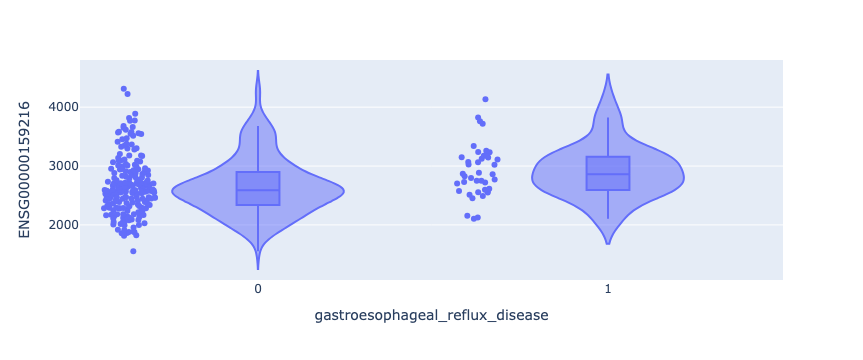

In [47]:
#this graphs the data without saving it
violin_bianary(thisdf, comorbid, gene)

# Now go back and change the gene or the comorbidity. Which genes seem to change with which comorbidity?

To change the gene or comorbidy go to the section that you set the gene and comorbidity and change which gene has no #. Then rerun all blocks between that section and this one.

## Advanced users: You can graph genes I have not shown you. You can graph comorbidities I have not shown you.

To graph a gene or comorbidity, uncomment the lines below to get the list of all comorbiditys and genes you can look at. Then, go up to the the section where we set the gene and comorbidity variables we wanted to look at. How would you make the notebook graph at a new gene or comorbidity?

In [35]:
#sorted(comorbid_df.columns)

In [ ]:
#sorted(gene_exp_df.columns)

# If you want to write an output file to your Google Drive, you will need to uncomment the line below and authenticate a connection.


In [ ]:

#drive.mount('/content/drive')


# This graphs the data  saving it to your google drive in a folder called DnALabfolder.


In [ ]:

#outdir="/content/drive/My Drive/DnALabfolder/"
#!mkdir -p "/content/drive/My Drive/DnALabfolder/"
#outfilename=outdir+comorbid+"_"+gene+".png"
#violin_bianary_output(thisdf, comorbid, gene, outfilename)